In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats 
import matplotlib.pyplot as plt

In [3]:
accepted_df = pd.read_csv("data/accepted_2007_to_2018Q4.csv")
accepted_df.head()

/var/folders/pg/r39s25yx6vn60b24nh6592th0000gn/T/ipykernel_8180/1630491485.py:1: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  accepted_df = pd.read_csv("data/accepted_2007_to_2018Q4.csv")


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Get the column names as a list
column_names = accepted_df.columns.tolist()
print("Total features: ", len(column_names))
for i in range(len(column_names)):
    print(column_names[i])


Total features:  151
id
member_id
loan_amnt
funded_amnt
funded_amnt_inv
term
int_rate
installment
grade
sub_grade
emp_title
emp_length
home_ownership
annual_inc
verification_status
issue_d
loan_status
pymnt_plan
url
desc
purpose
title
zip_code
addr_state
dti
delinq_2yrs
earliest_cr_line
fico_range_low
fico_range_high
inq_last_6mths
mths_since_last_delinq
mths_since_last_record
open_acc
pub_rec
revol_bal
revol_util
total_acc
initial_list_status
out_prncp
out_prncp_inv
total_pymnt
total_pymnt_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_d
last_pymnt_amnt
next_pymnt_d
last_credit_pull_d
last_fico_range_high
last_fico_range_low
collections_12_mths_ex_med
mths_since_last_major_derog
policy_code
application_type
annual_inc_joint
dti_joint
verification_status_joint
acc_now_delinq
tot_coll_amt
tot_cur_bal
open_acc_6m
open_act_il
open_il_12m
open_il_24m
mths_since_rcnt_il
total_bal_il
il_util
open_rv_12m
open_rv_24m
max_bal_bc
all_util
total

# EDA

In [10]:
# show null counts of each variable
accepted_df.isnull().sum().sort_values(ascending=False).to_frame('nulls')

,nulls
member_id,2260701
orig_projected_additional_accrued_interest,2252050
hardship_end_date,2249784
hardship_start_date,2249784
hardship_type,2249784
...,...
policy_code,33
revol_bal,33
fico_range_high,33
fico_range_low,33


In [17]:
# Assuming 'accepted_df' is your DataFrame
df_with_count = accepted_df['purpose'].value_counts().reset_index()
df_with_count.columns = ['purpose', 'count']
print(df_with_count)

               purpose    count
0   debt_consolidation  1277877
1          credit_card   516971
2     home_improvement   150457
3                other   139440
4       major_purchase    50445
5              medical    27488
6       small_business    24689
7                  car    24013
8             vacation    15525
9               moving    15403
10               house    14136
11             wedding     2355
12    renewable_energy     1445
13         educational      424


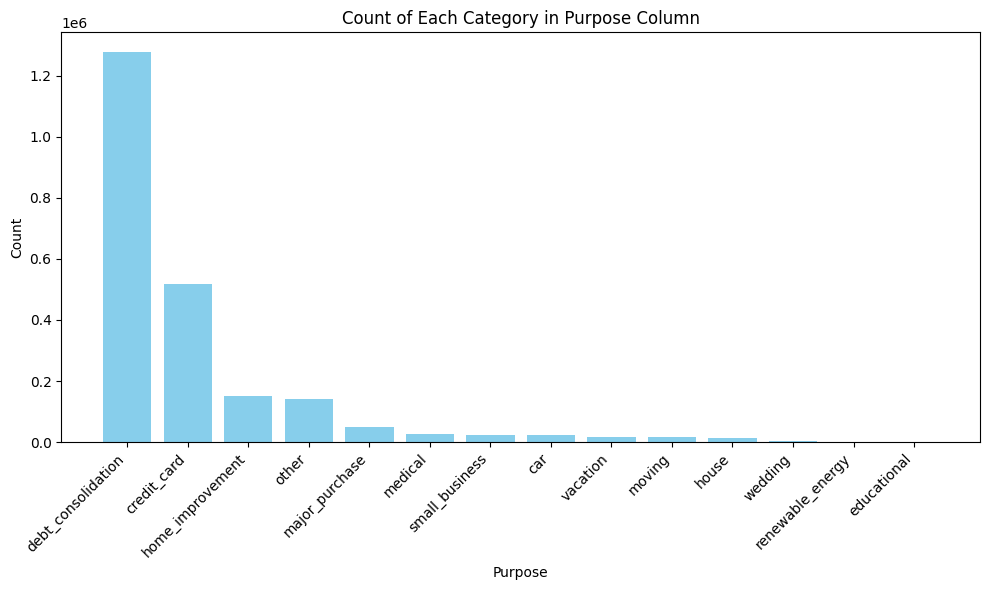

In [18]:
import matplotlib.pyplot as plt

# Assuming 'df_with_count' is your DataFrame with 'purpose' and 'count' columns
plt.figure(figsize=(10, 6))
plt.bar(df_with_count['purpose'], df_with_count['count'], color='skyblue')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.title('Count of Each Category in Purpose Column')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [19]:
# Assuming 'accepted_df' is your DataFrame
df_with_count = accepted_df['term'].value_counts().reset_index()
df_with_count.columns = ['term', 'count']
print(df_with_count)

         term    count
0   36 months  1609754
1   60 months   650914


In [21]:
df_with_count = accepted_df['acc_now_delinq'].value_counts().reset_index()
df_with_count.columns = ['acc_now_delinq', 'count']
print(df_with_count)

   acc_now_delinq    count
0             0.0  2251857
1             1.0     8293
2             2.0      421
3             3.0       50
4             4.0       11
5             5.0        3
6             6.0        2
7            14.0        1
8             7.0        1


In [28]:
df_with_count = accepted_df['loan_status'].value_counts().reset_index()
df_with_count.columns = ['loan_status', 'count']
df_with_count

,loan_status,count
0,Fully Paid,1078739
1,Current,878317
2,Charged Off,269360
3,Late,34252
4,Unknown,33


In [27]:
# Mapping function to categorize loan statuses
def categorize_loan_status(status):
    if pd.isna(status):
        return 'Unknown'
    elif 'Fully Paid' in status:
        return 'Fully Paid'
    elif 'Charged Off' in status or 'Default' in status:
        return 'Charged Off'
    elif 'Late' in status or 'In Grace Period' in status:
        return 'Late'
    else:
        return status

# Apply the mapping function to the 'loan_status' column
accepted_df['loan_status'] = accepted_df['loan_status'].apply(categorize_loan_status)

# Verify the changes
df_with_count = accepted_df['loan_status'].value_counts().reset_index()
df_with_count.columns = ['loan_status', 'count']
print(df_with_count)

   loan_status    count
0   Fully Paid  1078739
1      Current   878317
2  Charged Off   269360
3         Late    34252
4      Unknown       33
